In [1]:
import tensorflow as tf

In [3]:
# get mobilenetv2
model = tf.keras.applications.MobileNetV2(weights=None, input_shape=(32,32,3), classes=10)

model.summary()

Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                

In [5]:
model.load_weights('./weights/trained_cifar10_mobnet.h5')

In [9]:
from data import get_binary_cifar_data, cifar_classes
import numpy as np

class_names = list(cifar_classes.keys())

# create matrix to store test accuracies for each pair of classes
test_accuracies = np.zeros((10, 10))

# get each pair of classes and predict the probability of a stacked test set
for classI in class_names:
  for classJ in class_names:
    if classI == classJ:
      continue
    else:
      print('Predicting {} vs {}'.format(classI, classJ))
      _, (test_data, test_labels) = get_binary_cifar_data('pc', classI, classJ)
      predictions = model.predict(test_data)
      predictions = np.argmax(predictions, axis=1)
      test_labels = np.argmax(test_labels, axis=1)

      # calculate accuracy
      correct = np.sum(predictions == test_labels)
      accuracy = correct / len(test_labels)
      print('Accuracy: {}'.format(accuracy))
      
      # store accuracy
      test_accuracies[class_names.index(classI), class_names.index(classJ)] = accuracy



Predicting airplane vs automobile
Getting Data ...
Getting Data ...
Training Images Shape:  (50000, 32, 32, 3)
Training Labels Shape:  (50000, 1)
Testing Images Shape:  (10000, 32, 32, 3)
Testing Labels Shape:  (10000, 1)
Getting Data ...
Getting Data ...
Training Images Shape:  (50000, 32, 32, 3)
Training Labels Shape:  (50000, 1)
Testing Images Shape:  (10000, 32, 32, 3)
Testing Labels Shape:  (10000, 1)
63/63 [==============================] - 1s 19ms/step
Accuracy: 0.81
Predicting airplane vs bird
Getting Data ...
Getting Data ...
Training Images Shape:  (50000, 32, 32, 3)
Training Labels Shape:  (50000, 1)
Testing Images Shape:  (10000, 32, 32, 3)
Testing Labels Shape:  (10000, 1)
Getting Data ...
Getting Data ...
Training Images Shape:  (50000, 32, 32, 3)
Training Labels Shape:  (50000, 1)
Testing Images Shape:  (10000, 32, 32, 3)
Testing Labels Shape:  (10000, 1)
63/63 [==============================] - 1s 20ms/step
Accuracy: 0.6495
Predicting airplane vs cat
Getting Data ...
Ge

In [10]:
test_accuracies

array([[0.    , 0.81  , 0.6495, 0.637 , 0.6915, 0.7515, 0.675 , 0.7875,
        0.7815, 0.812 ],
       [0.81  , 0.    , 0.7125, 0.7   , 0.7545, 0.8145, 0.738 , 0.8505,
        0.8445, 0.875 ],
       [0.6495, 0.7125, 0.    , 0.5395, 0.594 , 0.654 , 0.5775, 0.69  ,
        0.684 , 0.7145],
       [0.637 , 0.7   , 0.5395, 0.    , 0.5815, 0.6415, 0.565 , 0.6775,
        0.6715, 0.702 ],
       [0.6915, 0.7545, 0.594 , 0.5815, 0.    , 0.696 , 0.6195, 0.732 ,
        0.726 , 0.7565],
       [0.7515, 0.8145, 0.654 , 0.6415, 0.696 , 0.    , 0.6795, 0.792 ,
        0.786 , 0.8165],
       [0.675 , 0.738 , 0.5775, 0.565 , 0.6195, 0.6795, 0.    , 0.7155,
        0.7095, 0.74  ],
       [0.7875, 0.8505, 0.69  , 0.6775, 0.732 , 0.792 , 0.7155, 0.    ,
        0.822 , 0.8525],
       [0.7815, 0.8445, 0.684 , 0.6715, 0.726 , 0.786 , 0.7095, 0.822 ,
        0.    , 0.8465],
       [0.812 , 0.875 , 0.7145, 0.702 , 0.7565, 0.8165, 0.74  , 0.8525,
        0.8465, 0.    ]])

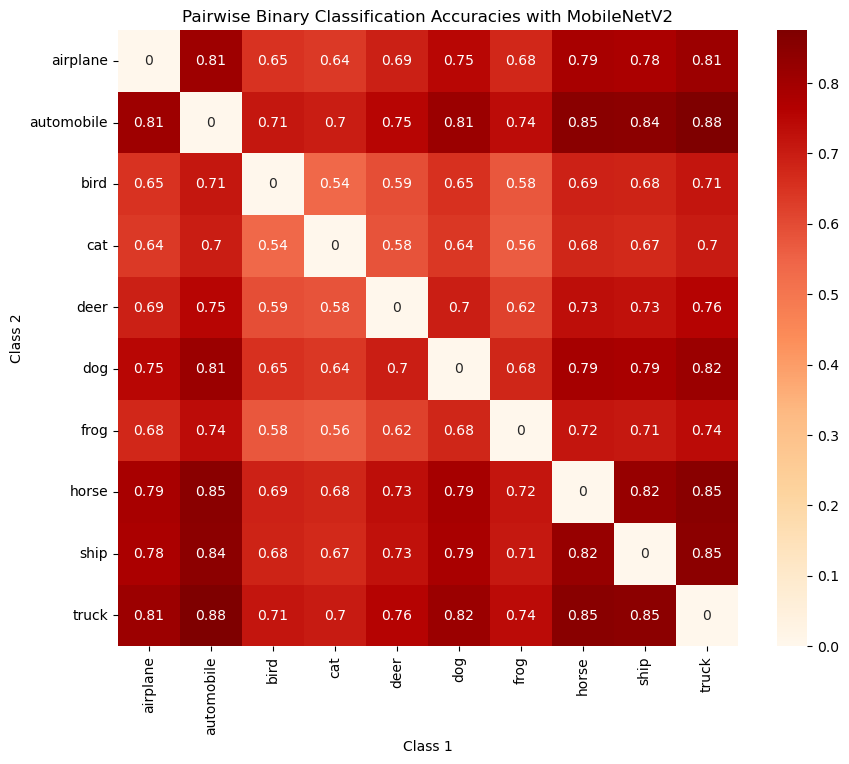

In [20]:
# plot a heatmap of the accuracies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(test_accuracies, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# possible cmaps
cmaps = ['Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd']

plt.xlabel('Class 1')
plt.ylabel('Class 2')
plt.title('Pairwise Binary Classification Accuracies with MobileNetV2')
plt.show()